In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

load the dataset

In [107]:
train = pd.read_csv('train_exit.csv')

In [108]:
train.head(5)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [109]:
train.shape

(13994, 30)

In [110]:
train.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [112]:
# Summary of Dataset 
train.describe(include=[object, np.number]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
player_id,13994,13994,PLID_4964,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,13994,13994,Keva Horan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,13994.0,NaN,NaN,NaN,21.135844,5.162719,16.0,17.0,20.0,24.0,61.0
gender,13975,2,M,6992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,13994,163,England,1157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,13994,31,6'0,2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,13577,88,165lbs,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ball_controlling_skills,13581.0,NaN,NaN,NaN,56.043958,16.787353,5.0,51.0,61.0,67.0,95.0
body_reflexes,13994.0,NaN,NaN,NaN,61.934329,14.931963,12.0,54.0,64.0,72.0,96.0
body_balance,13994.0,NaN,NaN,NaN,62.753323,14.203638,9.0,55.0,65.0,73.0,97.0


visualizations

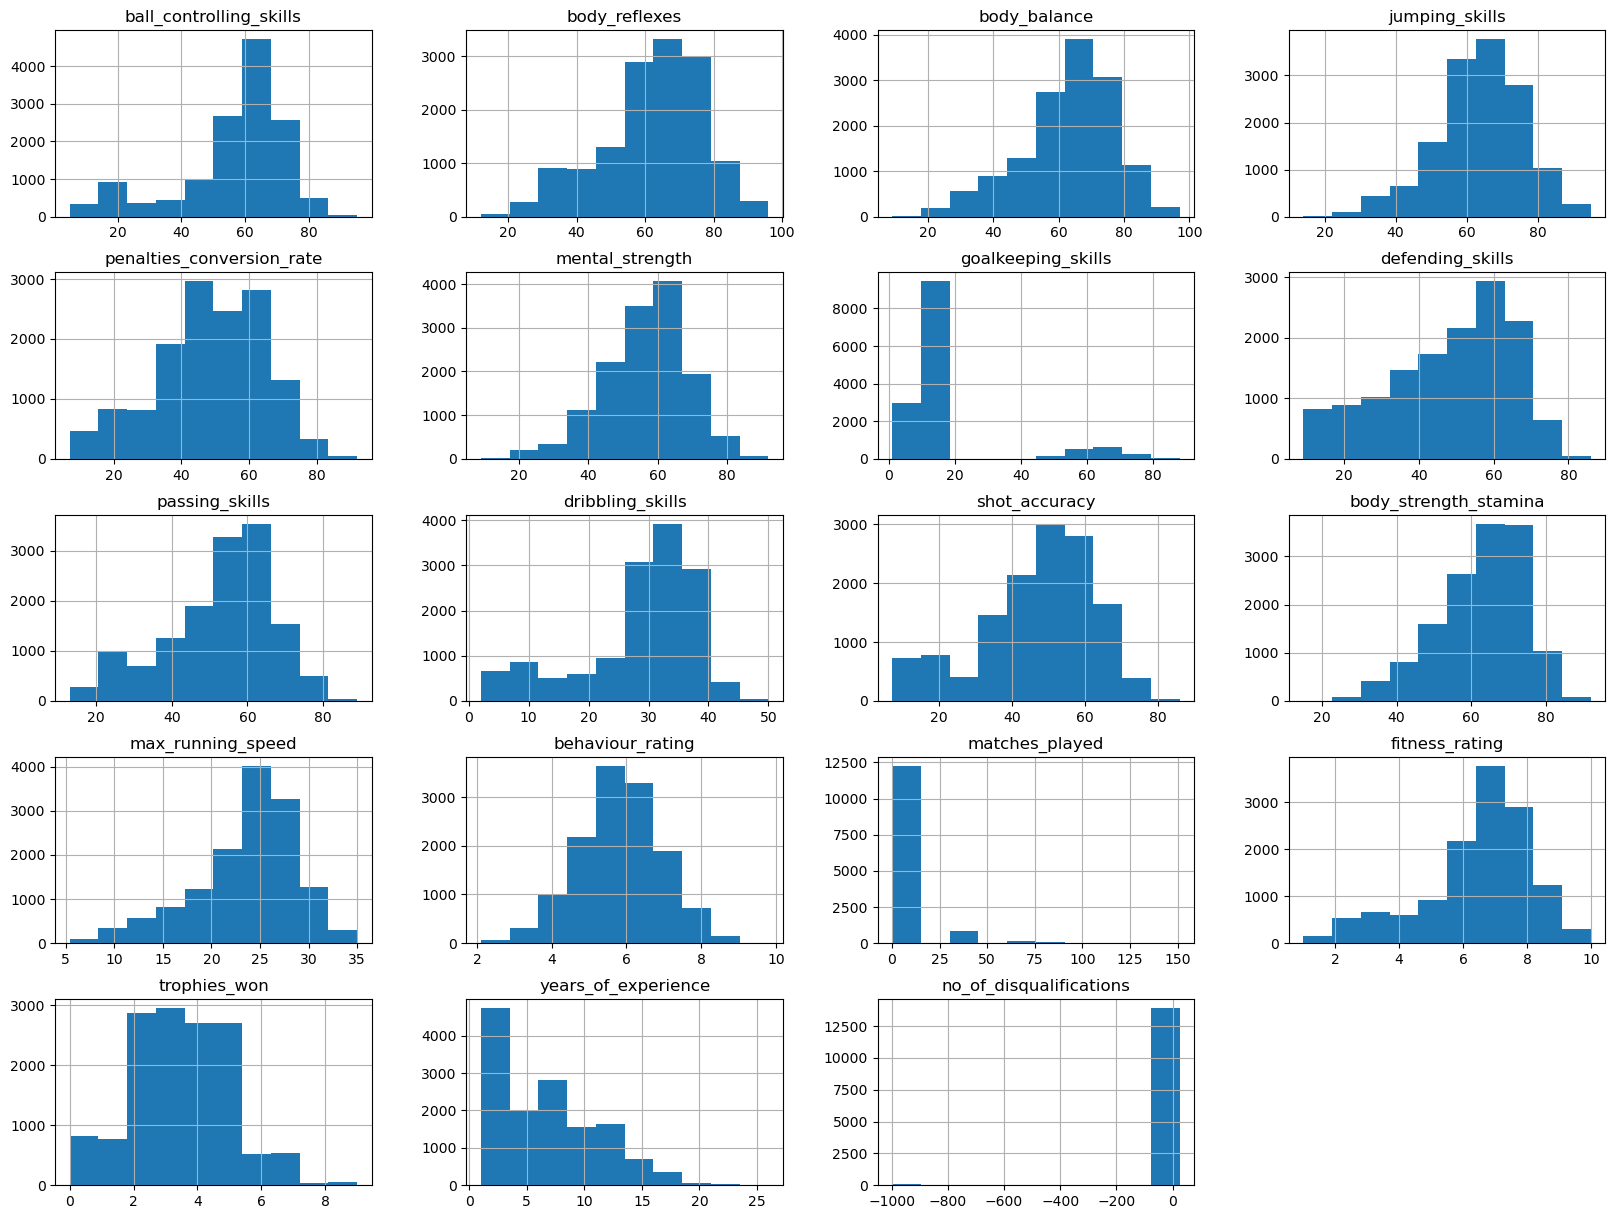

In [113]:
hist_graph = train.select_dtypes(include='float64')
hist_graph.hist(figsize=(20,15))
plt.show()

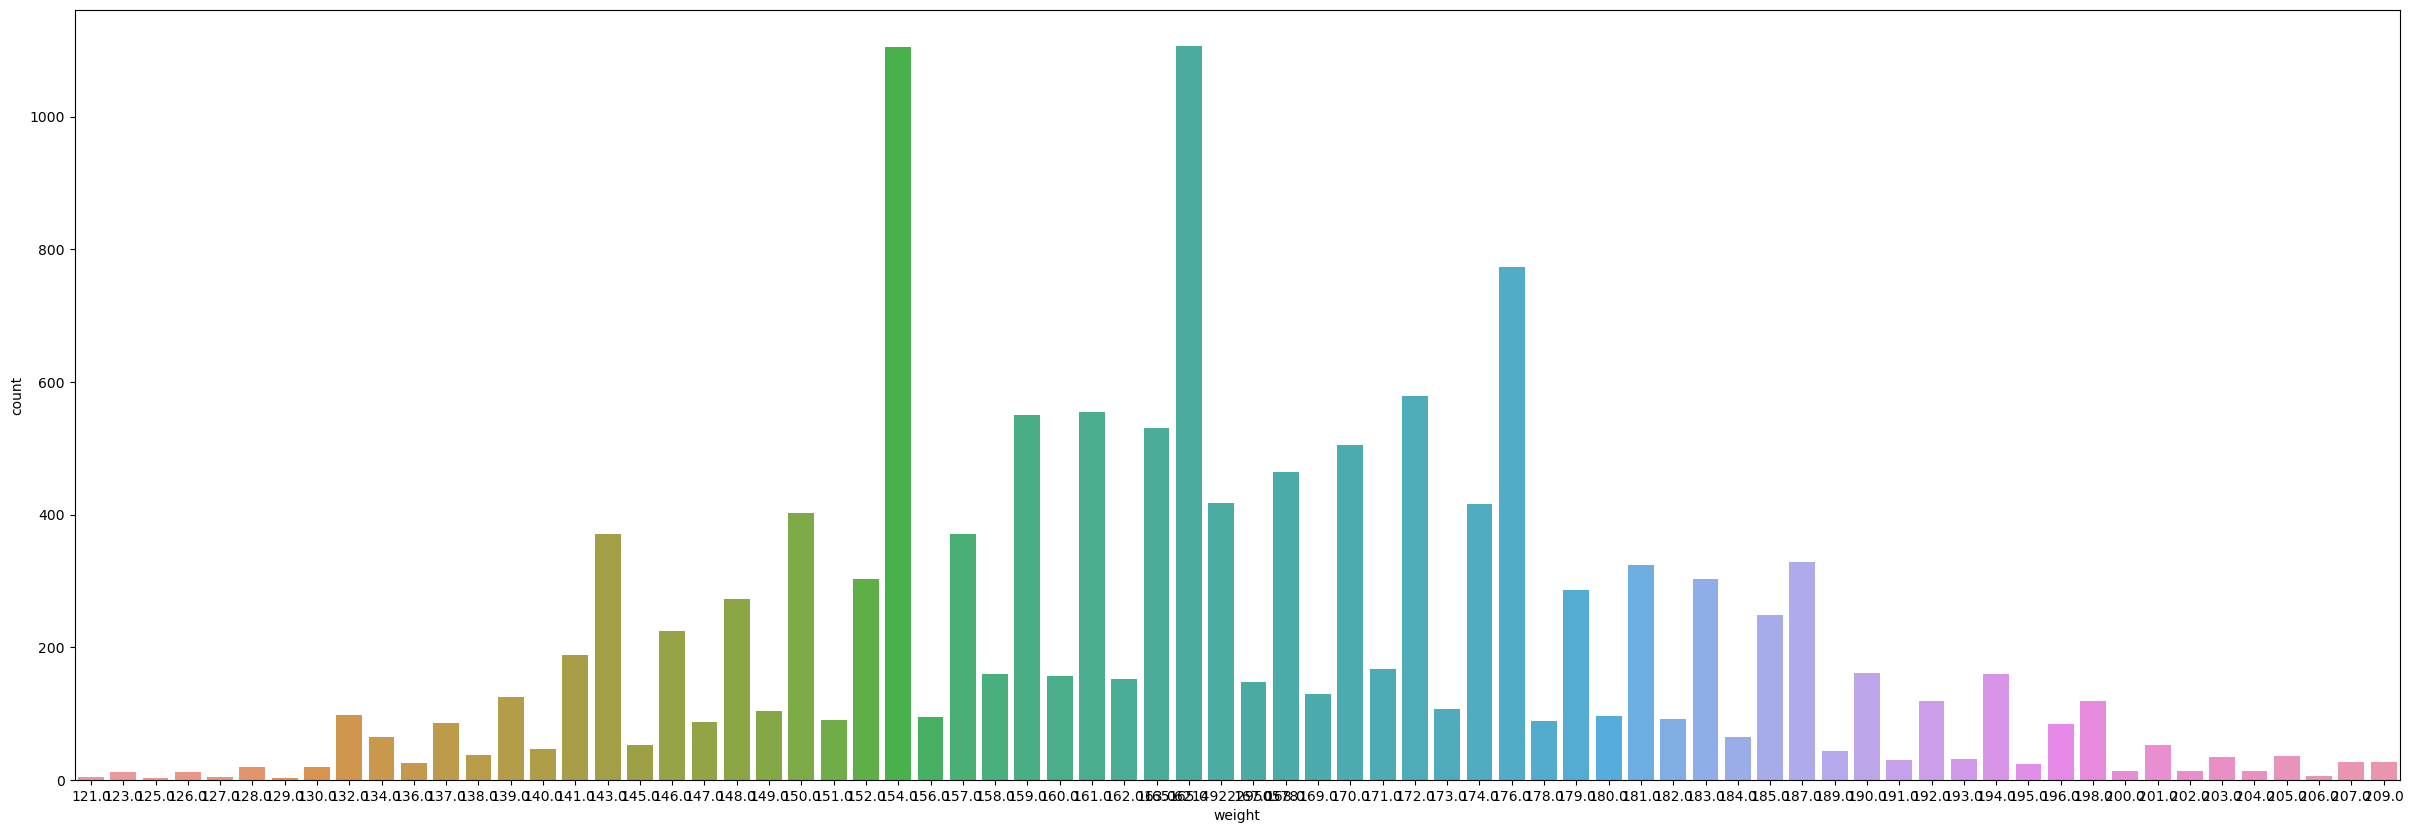

In [171]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'weight',data=train);

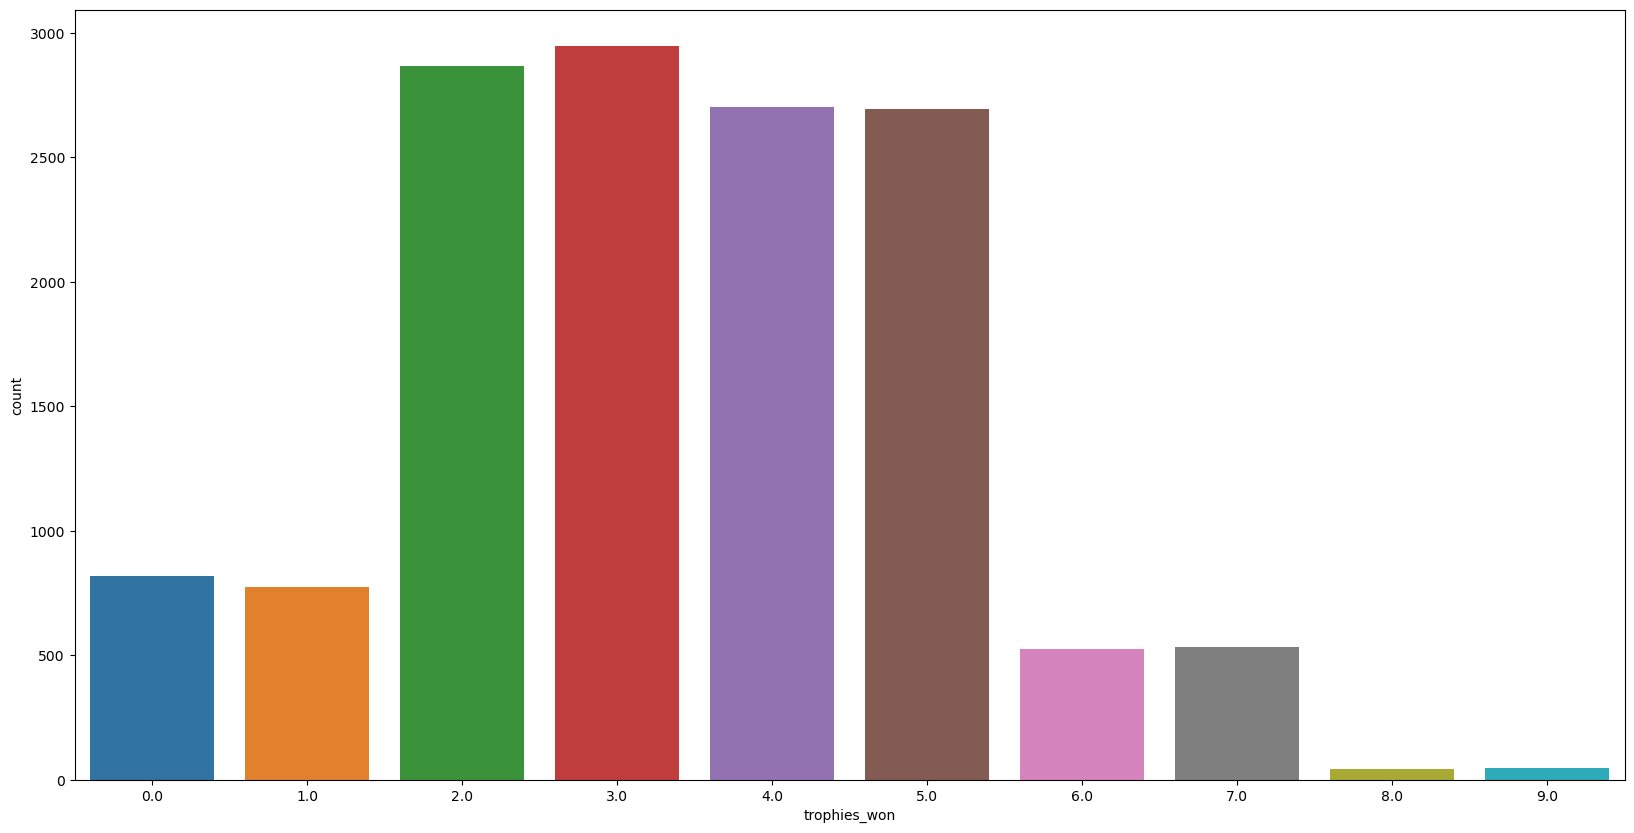

In [173]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'trophies_won',data=train);

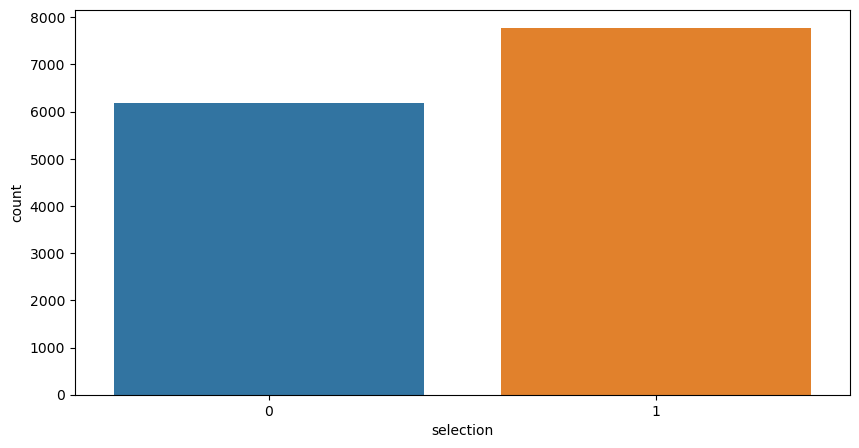

In [175]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'selection',data=train);

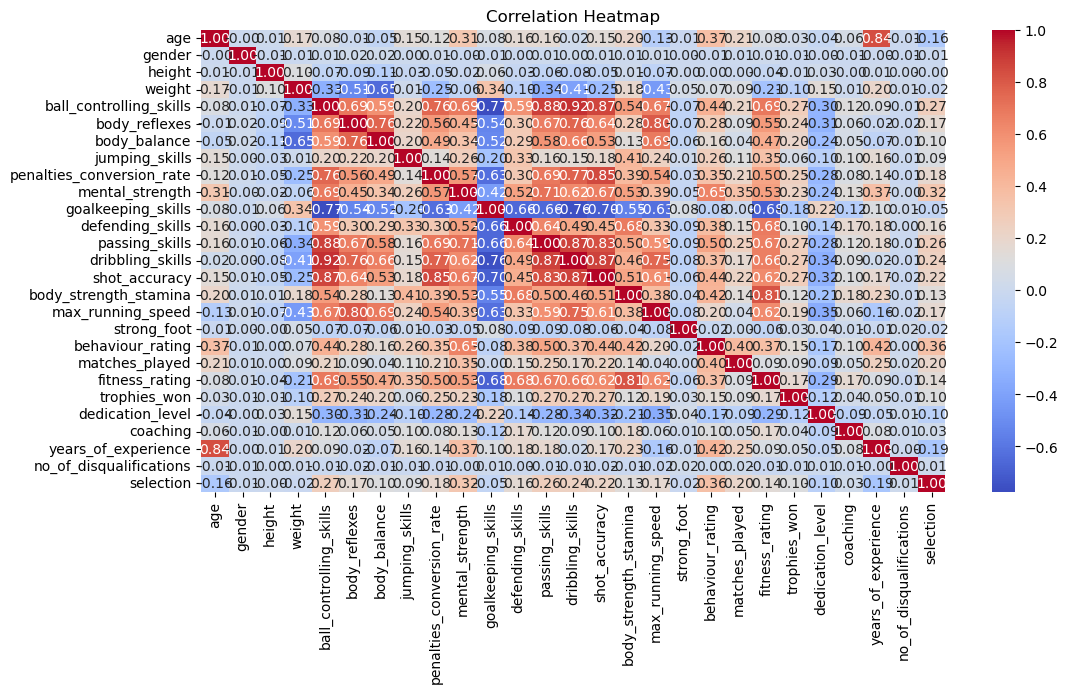

In [180]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Preprocesing

In [114]:
train.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [115]:
train['weight'] = train['weight'].str.replace('lbs', '')
train['weight']= train['weight'].astype('float64')
train.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176.0,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148.0,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172.0,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165.0,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158.0,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [116]:
train["gender"].fillna(train["gender"].mode()[0],inplace=True)
train["strong_foot"].fillna(train["strong_foot"].mode()[0],inplace=True)
train["coaching"].fillna(train["coaching"].mode()[0],inplace=True)

In [117]:
columns= ['ball_controlling_skills','penalties_conversion_rate','shot_accuracy','matches_played','fitness_rating','years_of_experience']
for i in columns:
        train[i].fillna(train[i].median(),inplace=True)

In [118]:
cols= ['weight','jumping_skills','mental_strength','behaviour_rating']
for i in cols:
    train[i].fillna(train[i].mean(),inplace=True)

In [119]:
train.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [120]:
#outliers removal

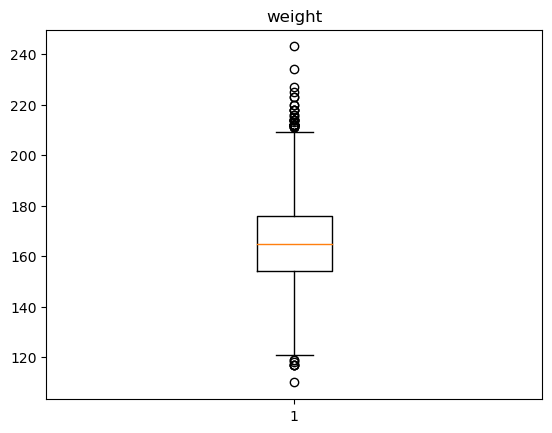

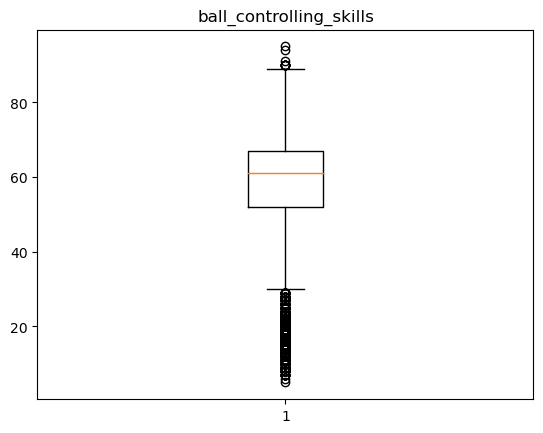

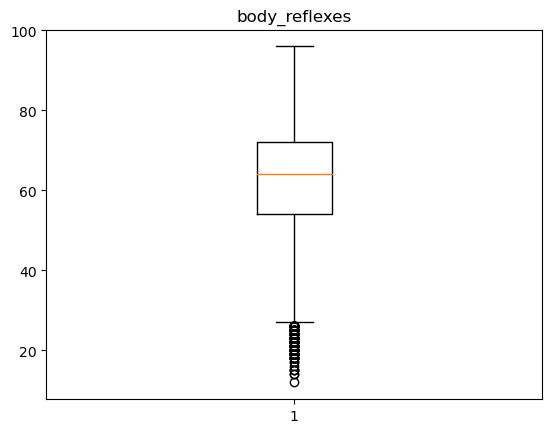

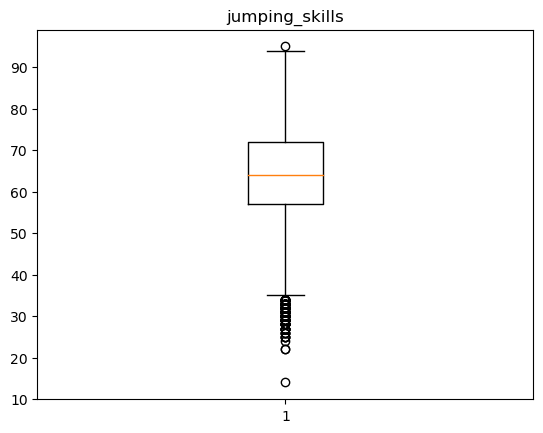

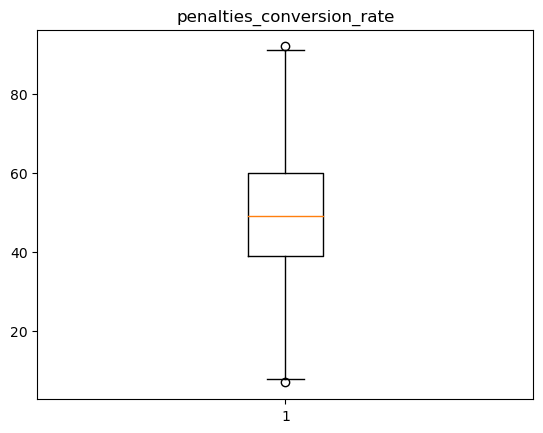

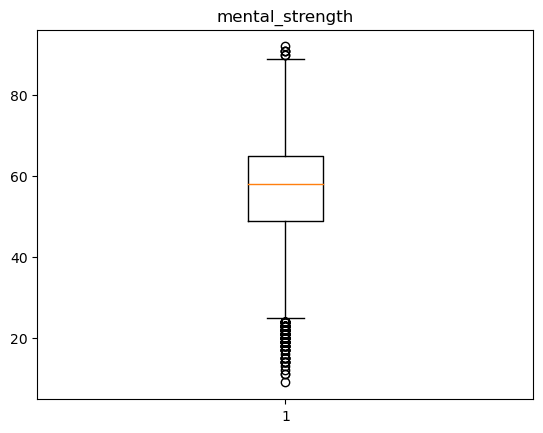

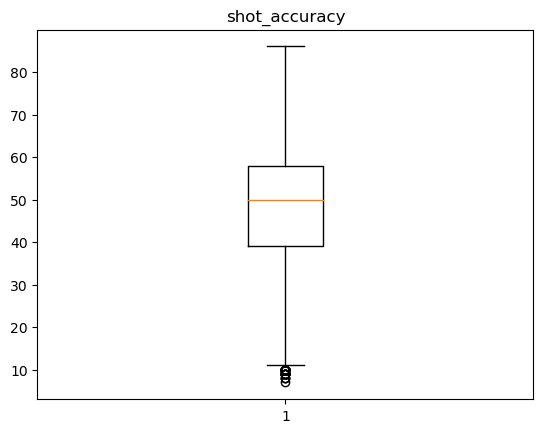

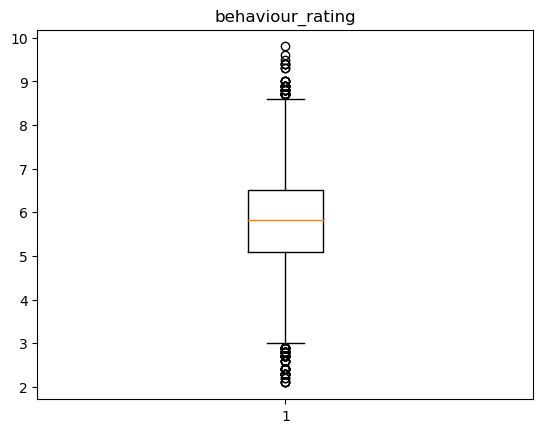

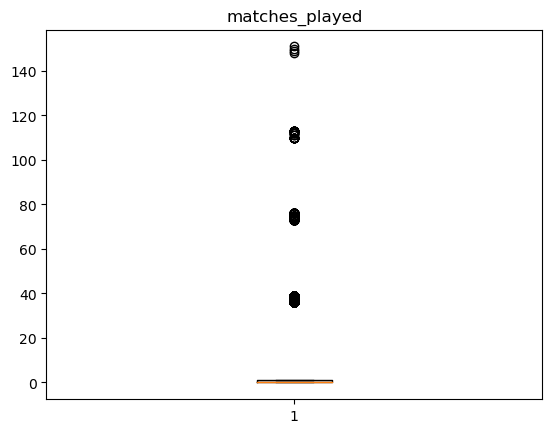

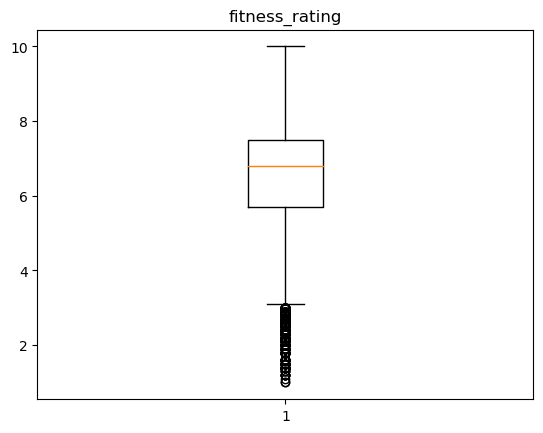

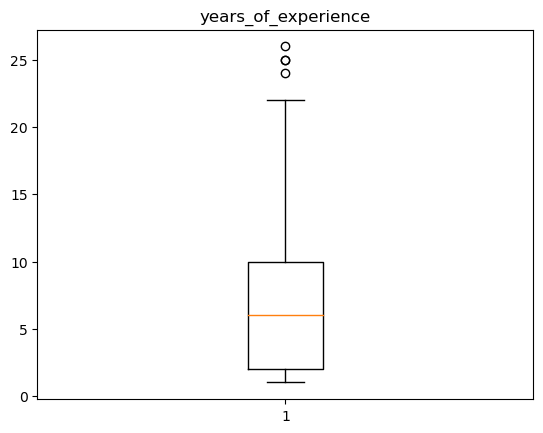

In [121]:
num_columns = ['weight','ball_controlling_skills','body_reflexes','jumping_skills','penalties_conversion_rate','mental_strength','shot_accuracy','behaviour_rating','matches_played','fitness_rating','years_of_experience']
for i in num_columns:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)
plt.show()

In [122]:
Q1 = np.percentile(train["weight"],25,method="midpoint")
Q2 = np.percentile(train["weight"],50,method="midpoint")
Q3 = np.percentile(train["weight"],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in train['weight']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 154.0
q2 is 165.0
q3 is 176.0
min is 121.0
max is 209.0
Ouliers are [212.0, 212.0, 211.0, 212.0, 212.0, 216.0, 214.0, 214.0, 117.0, 214.0, 212.0, 212.0, 225.0, 212.0, 220.0, 214.0, 214.0, 212.0, 110.0, 223.0, 211.0, 212.0, 212.0, 211.0, 218.0, 117.0, 216.0, 218.0, 118.0, 214.0, 119.0, 218.0, 119.0, 211.0, 212.0, 117.0, 117.0, 220.0, 227.0, 212.0, 212.0, 243.0, 234.0, 218.0, 213.0, 212.0, 215.0, 223.0]


In [124]:
ind_weight = train["weight"]>up_lim
ind1_weight = train.loc[ind_weight].index
ind1_weight

Int64Index([  446,   647,  1364,  1945,  2059,  2115,  2798,  2849,  3240,
             3283,  3316,  3601,  3606,  3961,  4103,  4217,  4676,  5323,
             5489,  5849,  5928,  6141,  6181,  7306,  7341,  7961,  8284,
            10498, 10606, 11058, 11725, 11744, 11786, 12043, 12272, 12608,
            12749, 12866, 13617, 13854],
           dtype='int64')

In [125]:
train.drop(ind1_weight,inplace = True)

In [129]:
ind2_weight = train["weight"]<low_lim
ind2_weight = train.loc[ind2_weight].index
ind2_weight

Int64Index([], dtype='int64')

In [130]:
train.drop(ind2_weight,inplace = True)

In [134]:
def convert_ht(height_str):
    # Split the string into feet and inches
    feet, inches = map(int, height_str.split("'"))

    # Convert feet to inches and add to inches
    total_inches = feet * 12 + inches

    # Convert total inches to float
    height_float = float(total_inches)

    return height_float
train['height'] = train["height"].apply(lambda x:convert_ht(x))
train['height'] = train['height'].astype('float64')

### Label Encoding

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','strong_foot','dedication_level','coaching']

for col in cols:
    train[col] = le.fit_transform(train[col])

In [135]:
train.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,1,Ukraine,74.0,176.0,77.0,58.0,47.0,...,3,7.700000,0.0,8.1,2.0,0,2,8.0,0.0,1
1,PLID_11234,Herma Tann,18,1,Russia,70.0,148.0,54.0,69.0,70.0,...,0,5.300000,0.0,6.8,3.0,2,1,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,0,Spain,74.0,172.0,34.0,43.0,45.0,...,1,4.700000,0.0,6.6,5.0,1,0,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,1,Chile,71.0,165.0,79.0,73.0,76.0,...,3,8.600000,113.0,8.6,6.0,2,0,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,0,Argentina,68.0,158.0,47.0,61.0,74.0,...,3,5.822068,0.0,5.7,5.0,2,0,4.0,0.0,0


In [ ]:
cols_to_drop = ['player_id','name','country']
train = train.drop(cols_to_drop, axis=1)

split the data

In [137]:
y = train['selection']
x = train.drop(['selection'],axis = 1)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

logistic regression 

In [139]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
  
model = lr.fit(x_train,y_train)   

In [140]:
y_predictions = model.predict(x_test)

In [141]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
    

In [142]:
confusion_matrix(y_test,y_predictions)

array([[1432,  600],
       [ 516, 2055]], dtype=int64)

In [143]:
y_predictions

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [144]:
print('Accuracy =',accuracy_score(y_test,y_predictions))

Accuracy = 0.7575494242885075


knn

In [145]:
from sklearn.neighbors import KNeighborsClassifier     

In [146]:

metric_k = []
neighbors = np.arange(3,15)
     

In [147]:

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

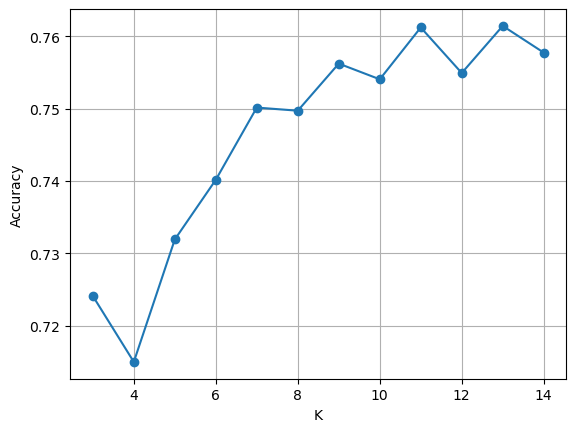

In [148]:

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
     

In [149]:
classifier = KNeighborsClassifier(n_neighbors = 13, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)


In [150]:
confusion_matrix(y_test,y_pred)

array([[1476,  556],
       [ 542, 2029]], dtype=int64)

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_pred))

SVM

In [152]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [153]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [154]:
confusion_matrix(y_test,y_pred_svm)

array([[1526,  506],
       [ 501, 2070]], dtype=int64)

In [155]:
accuracy_score(y_test,y_pred_svm)

0.7812296328481425

In [157]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [158]:
confusion_matrix(y_test,y_pred_svm1)

array([[1550,  482],
       [ 492, 2079]], dtype=int64)

In [159]:
accuracy_score(y_test,y_pred_svm)

0.7812296328481425

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(x_train,y_train)
y_pred_dt=model.predict(x_test)

In [161]:
confusion_matrix(y_test,y_pred_dt)

array([[1583,  449],
       [ 557, 2014]], dtype=int64)

In [162]:
accuracy_score(y_test,y_pred_dt)

0.7814468824679557

Random forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [164]:
confusion_matrix(y_test,y_pred_rf)

array([[1726,  306],
       [ 335, 2236]], dtype=int64)

In [165]:
accuracy_score(y_test,y_pred_rf)

0.860742993699761

In [166]:

rf_cls1=RandomForestClassifier(n_estimators=12)
model_rf1=rf_cls1.fit(x_train,y_train)
y_pred_rf1=model_rf1.predict(x_test)

In [167]:
confusion_matrix(y_test,y_pred_rf1)

array([[1732,  300],
       [ 437, 2134]], dtype=int64)

In [168]:
accuracy_score(y_test,y_pred_rf1)

0.8398870301976972

Best accuracy score is for Random Forest.